In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#filename reading
filename = 'numbers_for_checking.txt'
df = pd.read_csv(filename,sep='\t',header=None)
df.columns = ["datatype","targettype","RunID","energy","incoming ions","delta Z","iso_corr","geo_corr"]

In [3]:
target_deltaZ = df.loc[df["targettype"] == 'c_2198']

In [4]:
empty_deltaZ = df.loc[df["targettype"] == 'empty']

energy_vals = ["400","550","650","800"]
rel_iso_corr_vals = []
for ene in energy_vals:
    iso_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["iso_corr"]
    print(iso_corr_target)
    iso_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["iso_corr"]
    print(iso_corr_empty)
    rel_iso_corr = float(iso_corr_target)/float(iso_corr_empty)
    print("this is rel iso corr:\t",rel_iso_corr)
    rel_iso_corr_vals.append(rel_iso_corr)
#print(energy_vals)
print(rel_iso_corr_vals)
    
    

0    0.987003
Name: iso_corr, dtype: float64
4    0.99786
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9891197161926523
1    0.984956
Name: iso_corr, dtype: float64
5    0.996711
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9882062102254314
2    0.984957
Name: iso_corr, dtype: float64
6    0.996933
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9879871566093208
3    0.987686
Name: iso_corr, dtype: float64
7    0.997637
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9900254300913057
[0.9891197161926523, 0.9882062102254314, 0.9879871566093208, 0.9900254300913057]


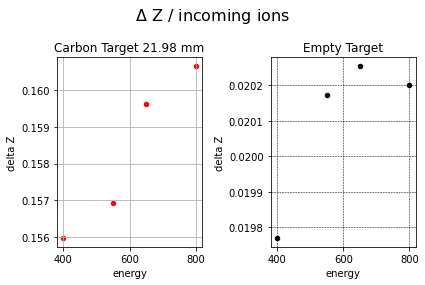

In [5]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z', color='black',marker= "o",alpha = 1,title="Empty Target")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
fig.suptitle(r'$\Delta$ Z / incoming ions',fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("delta_z.png",dpi=300)

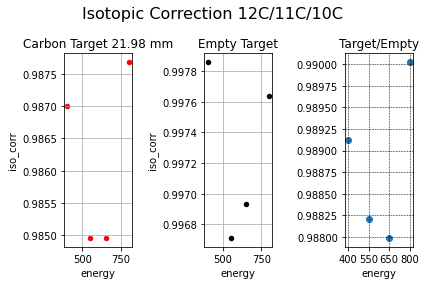

In [6]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,title="Empty Target")
#ax[2].plot(kind='scatter',x=energy_vals,y=rel_iso_corr_vals)
ax[2].scatter(energy_vals,rel_iso_corr_vals,label="target/empty")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
ax[2].set_title("Target/Empty")
ax[2].set_xlabel("energy")
fig.suptitle("Isotopic Correction 12C/11C/10C",fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("iso_corr.png",dpi=300)

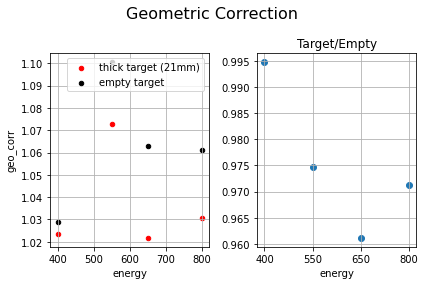

In [7]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
rel_geo_corr = []
for ene in energy_vals:
    geo_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["geo_corr"]
    geo_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["geo_corr"]
    rel_geo_corr_tmp = float(geo_corr_target)/float(geo_corr_empty)
    rel_geo_corr.append(rel_geo_corr_tmp)
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'geo_corr', color='red',marker= "o",alpha = 1,label="thick target (21mm)")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'geo_corr', color='black',marker= "o",alpha = 1,label="empty target")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[1].scatter(energy_vals,rel_geo_corr,label="hello")
ax[0].grid()
ax[1].grid()
ax[1].set_title("Target/Empty")
ax[1].set_xlabel("energy")
fig.suptitle("Geometric Correction",fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("geo_corr.png",dpi=300)

In [8]:
#df_div = float(target_deltaZ["geo_corr"])/float(empty_deltaZ["geo_corr"])
#df_div = target_deltaZ["geo_corr"].div((empty_deltaZ["geo_corr"]))
#print(target_deltaZ)
df_target = df.loc[(df["targettype"] == "c_2198")]["geo_corr"]
df_empty = df.loc[(df["targettype"] == "empty")]["geo_corr"]
for ene in energy_vals:
    geo_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["geo_corr"]
    geo_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["geo_corr"]
    print("this is geo_corr target:\t",geo_corr_target)
    print("this is geo_corr_empty:\t",geo_corr_empty)
    rel_geo_corr = float(geo_corr_target)/float(geo_corr_empty)
    print("rel_geo_corr:\t",rel_geo_corr)


this is geo_corr target:	 0    1.0234
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 4    1.02875
Name: geo_corr, dtype: float64
rel_geo_corr:	 0.9947995139732686
this is geo_corr target:	 1    1.07271
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 5    1.10056
Name: geo_corr, dtype: float64
rel_geo_corr:	 0.9746947008795523
this is geo_corr target:	 2    1.02171
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 6    1.06305
Name: geo_corr, dtype: float64
rel_geo_corr:	 0.961111895019049
this is geo_corr target:	 3    1.03086
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 7    1.06127
Name: geo_corr, dtype: float64
rel_geo_corr:	 0.9713456519076201
